# Import Packages

In [1]:
# Base Packages
import time
import random

# EDA packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics as sklearn_metrics

# Tensorflow & Keras packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model

In [2]:
tf.__version__

'2.6.2'

# TensorFlow - Neural Network Classification

## Typical Architecture for Classification


|Hyperparameter              |Typical Value                                                                                            |
|----------------------------|---------------------------------------------------------------------------------------------------------|
|Input Layer Shape           |Same shape as number of features (eg. 3 for #bedrooms, #bathrooms, # car space in house price prediction)|
|Hidden Layer(s)             |Problem specific, minimum = 1 & maximum = unlimited                                                      |
|Neurons per hidden layer    |Problem specific, generally 10 - 100                                                                     |
|Output Layer Shape          |1 per class (eg. 3 for food, person or dog photo)                                                        |
|Hidden Activation           |Usually ReLU, tanh                                                                                       |
|Output Activation           |Binary Class - Sigmoid, Multi-class - Softmax                                                                                         |
|Loss function               |Cross Entropy, Binary Classification - BinaryCrossentropy, Multi-class Classification - CategoricalCrossentropy|
|Optimizer                   |SGD(Stochastic Gradient Descent), Adam                                                                   |

## Sample Classification Problem

### Binary Class Classification

In [3]:
from sklearn.datasets import make_circles

In [4]:
n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [7]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

### Viz

In [8]:
circles = pd.DataFrame({
    'X0': X[:, 0],
    'X1': X[:, 1],
    'label': y
})

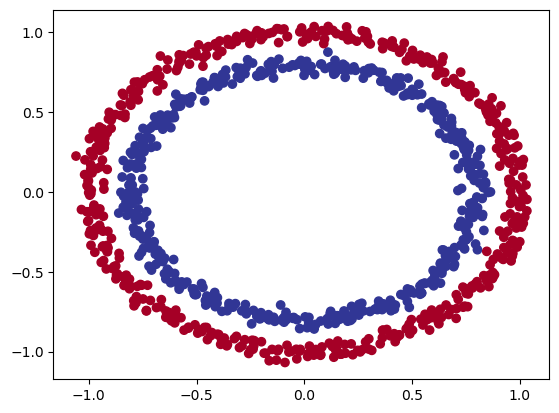

In [9]:
plt.scatter(
    circles.X0, circles.X1, c=y, cmap=plt.cm.RdYlBu
)

### Split Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

### Plot Decision Boundary

In [12]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100)
)

xx.shape, xx.ravel().shape

((100, 100), (10000,))

In [13]:
def plot_decision_boundary(model, X, y):
    
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    
    x_in = np.c_[xx.ravel(), yy.ravel()]
    
    y_pred = model.predict(x_in)
    
    if len(y_pred[0]) > 1:
        print('Multi-class Classification')
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('Binary Classification')
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu_r, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu_r)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

### Base Model

In [14]:
tf.random.set_seed(42)

base_model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(1)
])

base_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

base_model.fit(X_train, y_train, epochs=75)

2023-06-26 16:45:52.969201: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-26 16:45:52.969271: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-26 16:45:52.969299: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (582544b20265): /proc/driver/nvidia/version does not exist
2023-06-26 16:45:52.969627: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-26 16:45:53.027449: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] 

Epoch 1/75
25/25 [==============================] - 0s 1ms/step - loss: 4.3385 - accuracy: 0.4600
Epoch 2/75
25/25 [==============================] - 0s 971us/step - loss: 4.2259 - accuracy: 0.4313
Epoch 3/75
25/25 [==============================] - 0s 848us/step - loss: 4.1368 - accuracy: 0.4187
Epoch 4/75
25/25 [==============================] - 0s 880us/step - loss: 4.0682 - accuracy: 0.4112
Epoch 5/75
25/25 [==============================] - 0s 798us/step - loss: 3.9607 - accuracy: 0.4137
Epoch 6/75
25/25 [==============================] - 0s 981us/step - loss: 3.8429 - accuracy: 0.4175
Epoch 7/75
25/25 [==============================] - 0s 985us/step - loss: 3.7821 - accuracy: 0.4300
Epoch 8/75
25/25 [==============================] - 0s 918us/step - loss: 3.7582 - accuracy: 0.4387
Epoch 9/75
25/25 [==============================] - 0s 902us/step - loss: 3.6799 - accuracy: 0.4475
Epoch 10/75
25/25 [==============================] - 0s 1ms/step - loss: 3.5987 - accuracy: 0.4462
Epo

In [15]:
base_model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.7659 - accuracy: 0.4550


[0.7659306526184082, 0.45500001311302185]

In [16]:
y_preds = base_model.predict(X_test)

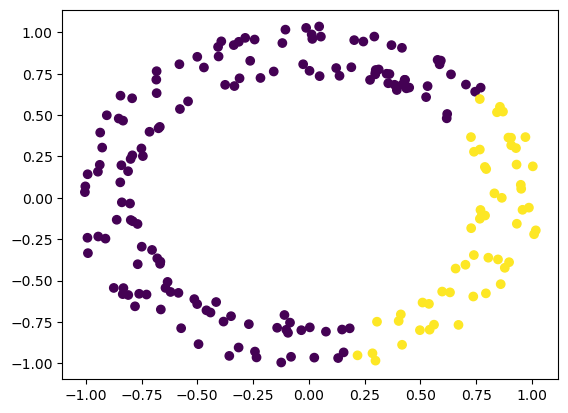

In [17]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_preds>0.5)

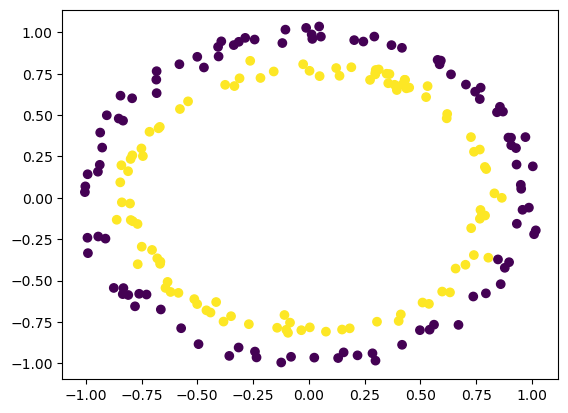

In [18]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

Binary Classification


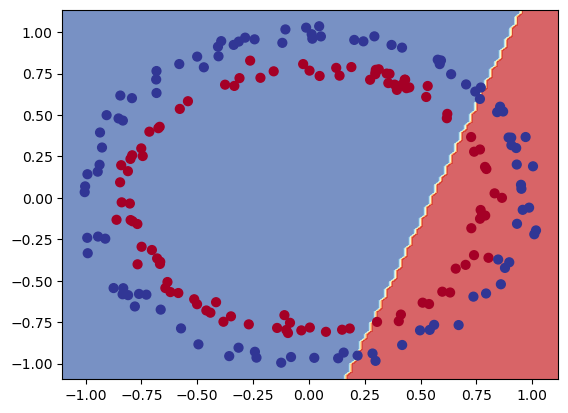

In [19]:
plot_decision_boundary(base_model, X=X_test, y=y_test)

### Tuned Model - V1

In [20]:
tf.random.set_seed(42)

circ_v1_model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(100),
    keras.layers.Dense(10),
    keras.layers.Dense(1)
])

circ_v1_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)


circ_v1_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 3.5146 - accuracy: 0.4500
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 1.1887 - accuracy: 0.4550
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7458 - accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7228 - accuracy: 0.5000
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7096 - accuracy: 0.5000
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7030 - accuracy: 0.5000
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6981 - accuracy: 0.5000
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4487
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4787
Epoch 11/

In [21]:
circ_v1_model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5650


[0.6947617530822754, 0.5649999976158142]

Binary Classification


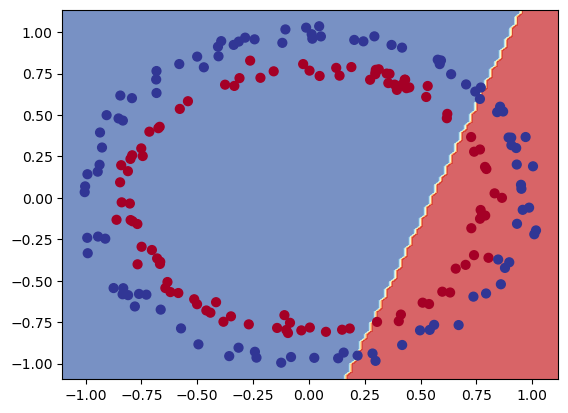

In [22]:
plot_decision_boundary(model=base_model, X=X_test, y=y_test)

### Tuned Model - V2

In [23]:
tf.random.set_seed(42)

circ_v2_model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(100, activation=keras.activations.relu),
    keras.layers.Dense(10, activation=keras.activations.relu),
    keras.layers.Dense(1, activation=keras.activations.sigmoid)
])

circ_v2_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

history = circ_v2_model.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.4988
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5038
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5000
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5075
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.5000
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.5013
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.5275
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6476 - accuracy: 0.5813
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.6325
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6164 - accuracy: 0.8025
Epoch 11/25
25/25 [

In [24]:
circ_v2_model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 1.0000


[0.2021884024143219, 1.0]

Binary Classification


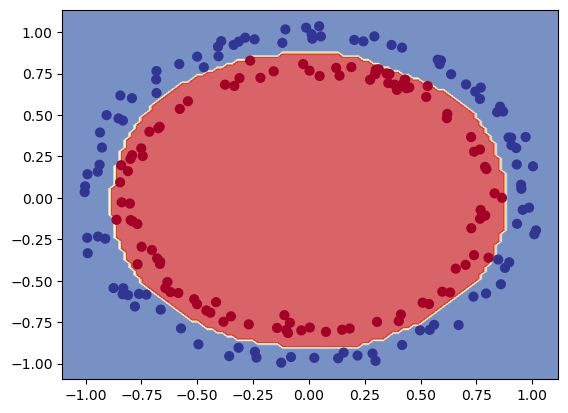

In [25]:
plot_decision_boundary(model=circ_v2_model, X=X_test, y=y_test)

### Viz History of epochs

In [26]:
history_df = pd.DataFrame(history.history)

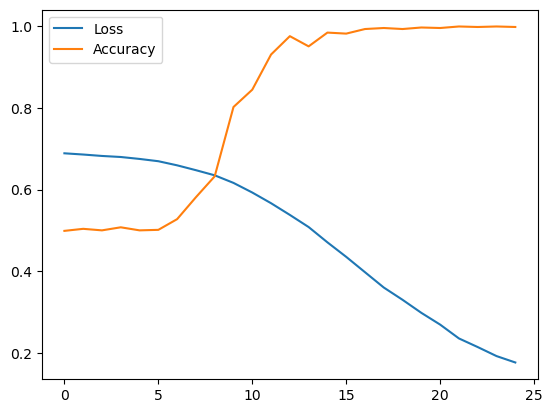

In [27]:
plt.plot(history_df.index, history_df.loss, label='Loss')
plt.plot(history_df.index, history_df.accuracy, label='Accuracy')
plt.legend()

### Tuned Model - V3

#### Using Callbacks - Optimal Learning Rate

In [28]:
tf.random.set_seed(42)

circ_v3_model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(100, activation=keras.activations.relu),
    keras.layers.Dense(10, activation=keras.activations.relu),
    keras.layers.Dense(1, activation=keras.activations.sigmoid)
])

circ_v3_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = circ_v3_model.fit(
    X_train, y_train, 
    epochs=100, 
    callbacks=[lr_scheduler]
)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.4950
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5013
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5050
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5050
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5050
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5113
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5000
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5000
Epoch 11/

In [29]:
history_v3_df = pd.DataFrame(history.history)

In [30]:
history_v3_df.columns

Index(['loss', 'accuracy', 'lr'], dtype='object')

<AxesSubplot:xlabel='epochs'>

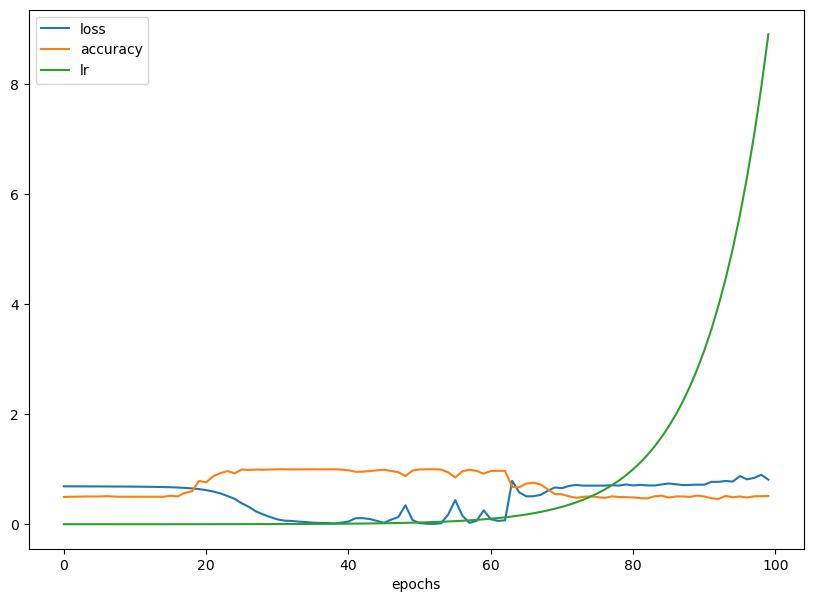

In [31]:
history_v3_df.plot(
    figsize=(10, 7),
    xlabel='epochs'
)

Text(0, 0.5, 'Loss')

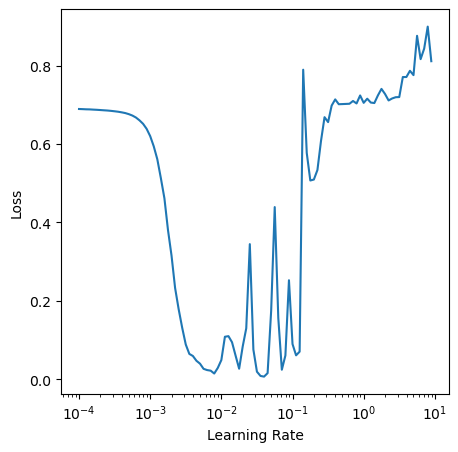

In [32]:
plt.figure(figsize=(5, 5))
plt.semilogx(history_v3_df.lr, history_v3_df.loss)
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

**Learning Rate is best between $10^{-3}$ to $10^{-2}$**

**The Default learning rate of Adam Optimizer is 0.001 which is $10^{-3}$**. Hence, The model v2 worked better

### Tuned Model - V4

In [33]:
tf.random.set_seed(42)

circ_v4_model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(100, activation=keras.activations.relu),
    keras.layers.Dense(10, activation=keras.activations.relu),
    keras.layers.Dense(1, activation=keras.activations.sigmoid)
])

circ_v4_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.009),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

history = circ_v4_model.fit(
    X_train, y_train, 
    epochs=15
)

Epoch 1/15
25/25 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5312
Epoch 2/15
25/25 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.5987
Epoch 3/15
25/25 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7950
Epoch 4/15
25/25 [==============================] - 0s 2ms/step - loss: 0.3795 - accuracy: 0.9625
Epoch 5/15
25/25 [==============================] - 0s 2ms/step - loss: 0.2268 - accuracy: 0.9588
Epoch 6/15
25/25 [==============================] - 0s 2ms/step - loss: 0.1087 - accuracy: 0.9950
Epoch 7/15
25/25 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9975
Epoch 8/15
25/25 [==============================] - 0s 2ms/step - loss: 0.0428 - accuracy: 1.0000
Epoch 9/15
25/25 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.9987
Epoch 10/15
25/25 [==============================] - 0s 2ms/step - loss: 0.0271 - accuracy: 1.0000
Epoch 11/15
25/25 [

### Classification Evaluation Methods

|Metric Name      |Metric Formula                                |Code                             |When to use                                                          |
|-----------------|----------------------------------------------|---------------------------------|---------------------------------------------------------------------|
|Accuracy         |$\frac{t_p+t_n}{t_p+t_n+f_p+f_n}$             |keras.metrics.Accuracy()         |Default metric for classification but not best for unbalanced dataset|
|Precision        |$\frac{t_p}{t_p+f_p}$                         |keras.metrics.Precision()        |Higher Precision leads to less false possitive                       |
|Recall           |$\frac{t_p}{t_p+f_n}$                         |keras.metrics.Recall()           |Higher Recall leads to less false negatives                          |
|F1-score         |$\frac{2*precision*recall}{precision+recall} $|sklearn.metrics.f1_score()       |Good overall metric for a classification Model                       |
|Confusion Matrix |NA                                            |sklearn.metrics.confuson_matrix()|Comparing predictions to truth labels to see where model is confused |

**Note: Increasing Recall reduces Precision and vice-versa**

In [34]:
np.squeeze(circ_v4_model.predict(X_test)) > 0.5

array([ True, False,  True, False,  True,  True, False, False,  True,
       False,  True,  True, False,  True, False,  True,  True, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True, False, False,  True,  True, False, False, False, False,
        True, False,  True,  True,  True, False,  True, False, False,
        True,  True,  True,  True, False, False, False,  True, False,
       False,  True,  True,  True,  True, False, False,  True, False,
        True, False,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True, False, False,  True,  True, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False,  True,
       False,  True, False,  True, False, False,  True,  True, False,
        True,  True,

In [35]:
y_preds = np.where(np.squeeze(circ_v4_model.predict(X_test)) > 0.5, 1, 0)

In [36]:
X_test.shape

(200, 2)

In [37]:
cm = sklearn_metrics.confusion_matrix(y_test, y_preds)

In [38]:
cm = cm / cm.astype(np.float64).sum(axis=1)

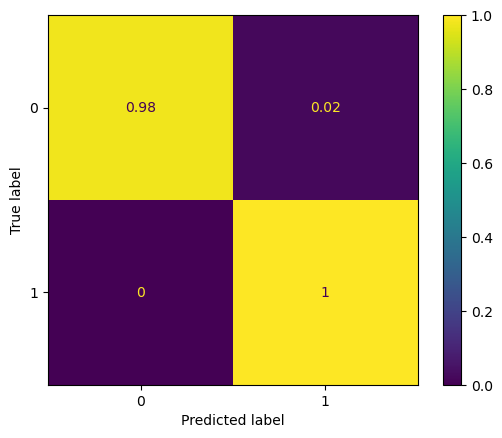

In [39]:
sklearn_metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]).plot()

In [40]:
def get_confusion_matrix(model, X, y, is_multiclass=False):
    
    if is_multiclass:
        y_preds = model.predict(X).argmax(axis=1)
    else:
        y_preds = np.where(np.squeeze(model.predict(X)) > 0.5, 1, 0)
    
    # Confusion Matrix
    cm = sklearn_metrics.confusion_matrix(y, y_preds)
    #Normalize CM
    cm_ = cm / cm.astype(np.float64).sum(axis=1)
    
    #Plot CM
    if is_multiclass:
        pass
    else:
        sklearn_metrics.ConfusionMatrixDisplay(confusion_matrix=cm_, display_labels=[0, 1]).plot()
    
    return {
        'y_preds': y_preds,
        'cm': cm
    }
    

{'y_preds': array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        1, 1]),
 'cm': array([[ 98,   2],
        [  0, 100]])}

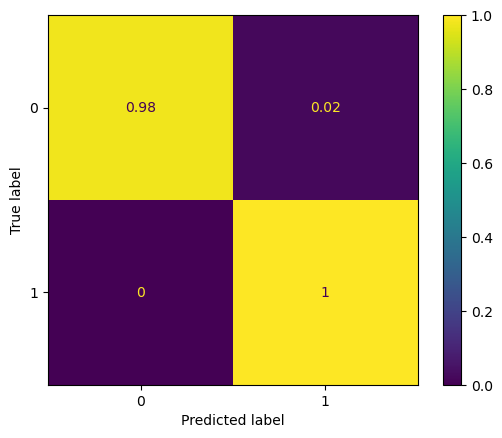

In [41]:
get_confusion_matrix(circ_v4_model, X_test, y_test)

## Multi-class Classification - Fashion MNIST Dataset

### Load Data

In [42]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [43]:
np.set_printoptions(linewidth=320)

In [44]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

### Viz data

(<matplotlib.image.AxesImage at 0x7fd62022eac0>, 9)

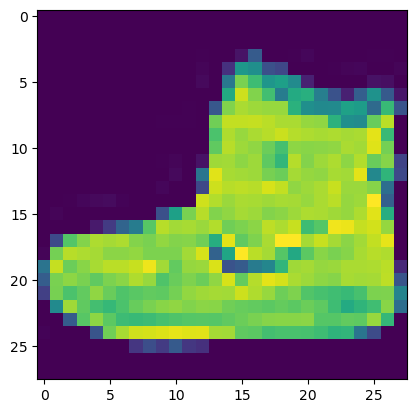

In [46]:
plt.imshow(X_train[0]), y_train[0]

In [47]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

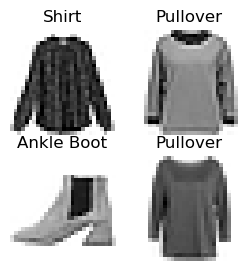

In [48]:
plt.figure(figsize=(3, 3))

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    choice = random.choice(range(len(X_train)))
    plt.imshow(X_train[choice], cmap=plt.cm.binary)
    plt.title(class_names[y_train[choice]])
    plt.axis(False)

### Normalize Data

In [49]:
X_train = X_train/255.
X_test = X_test/255.

In [50]:
X_train.shape

(60000, 28, 28)

### Base Model

In [51]:
tf.random.set_seed(42)

fash_mnist_model_base = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=keras.activations.relu),
    keras.layers.Dense(256, activation=keras.activations.relu),
    keras.layers.Dense(128, activation=keras.activations.relu),
    keras.layers.Dense(10, activation=keras.activations.softmax)
])

fash_mnist_model_base.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

fash_mnist_model_base.fit(X_train, y_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4866 - accuracy: 0.8216
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3650 - accuracy: 0.8651
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3292 - accuracy: 0.8781
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3074 - accuracy: 0.8864
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2889 - accuracy: 0.8906
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2744 - accuracy: 0.8964
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2606 - accuracy: 0.9022
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2525 - accuracy: 0.9042
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2404 - accuracy: 0.9089
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.232

### Model V1 - Using OHE

In [52]:
tf.random.set_seed(42)

fash_mnist_model_v1 = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=keras.activations.relu),
    keras.layers.Dense(256, activation=keras.activations.relu),
    keras.layers.Dense(128, activation=keras.activations.relu),
    keras.layers.Dense(10, activation=keras.activations.softmax)
])

fash_mnist_model_v1.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

history_v1 = fash_mnist_model_v1.fit(X_train, tf.one_hot(y_train, depth=10), epochs=25)

Epoch 1/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4866 - accuracy: 0.8216
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3650 - accuracy: 0.8651
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3292 - accuracy: 0.8781
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3074 - accuracy: 0.8864
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2889 - accuracy: 0.8906
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2744 - accuracy: 0.8964
Epoch 7/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2606 - accuracy: 0.9022
Epoch 8/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2525 - accuracy: 0.9042
Epoch 9/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2404 - accuracy: 0.9089
Epoch 10/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.232

In [53]:
fash_mnist_model_v1.evaluate(X_test, tf.one_hot(y_test, depth=10))

313/313 [==============================] - 1s 2ms/step - loss: 0.4325 - accuracy: 0.8885


[0.4325137138366699, 0.8884999752044678]

In [54]:
X_test.shape

(10000, 28, 28)

In [55]:
fash_mnist_model_v1.predict(X_test).argmax(axis=1)

array([9, 2, 1, ..., 8, 1, 5])

In [56]:
fash_mnist_model_base.predict(X_test).argmax(axis=1)

array([9, 2, 1, ..., 8, 1, 5])

In [57]:
result = get_confusion_matrix(fash_mnist_model_base, X_test, y_test, is_multiclass=True)

In [58]:
y_preds, cm = result['y_preds'], result['cm']

<AxesSubplot:>

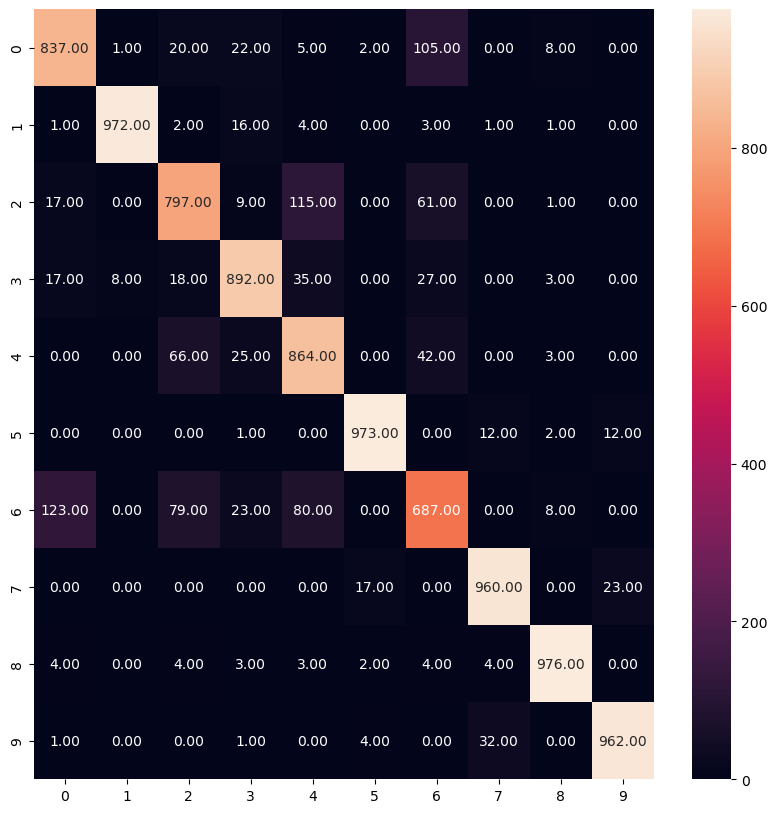

In [59]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='.2f')